In [28]:
# WEATHERPY: HOMEWORK 6 APIs Project

In [41]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine the city based on Latitude and Longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of Latitudes and Longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [111]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
# print(len(cities), cities)
len(cities)

604

In [114]:
# Weather check on each city using a series of successive API calls including a print log of each
    # city as it's being processed (with city name and city number)
    
base_url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = "b0cee0b265a015d896d7d17bcf326e7b" # OpenWeather API key

# parameters to pulled and placed into empty lists
city_responses = [] # empty list for storing responses
cloudiness = []
country = []
date = []
humidity = []
lat = [] # join latitude and longitude at later stage
lng = []
max_temp = []
wind_speed = []
name = []

indices = len(cities) # length of the number of elements in the above list of cities

In [116]:
# Loop to make a request for each of the indices

for city in range(len(cities)):
    
    response = requests.get(base_url + "appid=" + api_key + "&q=" + str(cities[city]))
    response_json = response.json()
    city_responses.append(response.json())
    
    try:
        print(f"Processing record {city} of Set {city} | {str(cities[city])}")
        city_responses.append(response.json())
        name.append(response_json['name'])
        cloudiness.append(response_json['clouds']['all'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])
        humidity.append(response_json['main']['humidity'])
        lat.append(response_json['coord']['lat'])
        lng.append(response_json['coord']['lon'])
        max_temp.append(response_json['main']['temp_max'])
        wind_speed.append(response_json['wind']['speed'])
        
    except:
        print("City not found. Skipping...")
        pass

Processing record 0 of Set 0 | rikitea
Processing record 1 of Set 1 | fare
Processing record 2 of Set 2 | tuatapere
Processing record 3 of Set 3 | carnarvon
Processing record 4 of Set 4 | hit
Processing record 5 of Set 5 | yeppoon
Processing record 6 of Set 6 | saskylakh
Processing record 7 of Set 7 | ushuaia
Processing record 8 of Set 8 | taolanaro
City not found. Skipping...
Processing record 9 of Set 9 | ula
Processing record 10 of Set 10 | port alfred
Processing record 11 of Set 11 | attawapiskat
City not found. Skipping...
Processing record 12 of Set 12 | butaritari
Processing record 13 of Set 13 | hermanus
Processing record 14 of Set 14 | yerbogachen
Processing record 15 of Set 15 | flin flon
Processing record 16 of Set 16 | longyearbyen
Processing record 17 of Set 17 | shieli
Processing record 18 of Set 18 | atuona
Processing record 19 of Set 19 | codrington
Processing record 20 of Set 20 | soltsy
Processing record 21 of Set 21 | punta arenas
Processing record 22 of Set 22 | tho

In [122]:
# List of weather data for all requested cities
    # Print/uncomment only to check data was stored in empty list

city_df = pd.DataFrame({
    'City': name,
    'Cloudiness': cloudiness,
    'Country': country,
    'Date': date,
    'Humidity': humidity,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Wind Speed': wind_speed,
})
city_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,100,PF,1578027822,79,-23.12,-134.97,299.39,1.83
1,Fare,100,PF,1578028265,80,-16.70,-151.02,300.91,3.36
2,Tuatapere,60,NZ,1578028265,87,-46.13,167.69,284.82,6.71
3,Carnarvon,0,ZA,1578027901,50,-30.97,22.13,294.87,4.21
4,Hit,0,IQ,1578027839,48,33.64,42.83,285.23,2.88
5,Yeppoon,0,AU,1578027941,35,-23.13,150.74,305.15,5.70
6,Saskylakh,99,RU,1578027845,96,71.97,114.09,246.66,4.07
7,Ushuaia,4,AR,1578027833,49,-54.81,-68.31,282.15,7.70
8,Ula,75,TR,1578028266,57,37.10,28.42,283.15,3.60
9,Port Alfred,70,ZA,1578027825,95,-33.59,26.89,294.26,6.00


In [130]:
city_df['City'].value_counts()

Dikson            2
Pisco             2
New Norfolk       2
Codrington        2
Hasaki            2
                 ..
Hithadhoo         1
Gravelbourg       1
Iroquois Falls    1
Tres Arroyos      1
Leua              1
Name: City, Length: 551, dtype: int64

In [142]:
df = pd.DataFrame(city_df)
city_dupl = pd.DataFrame.drop_duplicates(df)
city_reindex = city_dupl.reset_index(drop=True)
city_reindex.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,100,PF,1578027822,79,-23.12,-134.97,299.39,1.83
1,Fare,100,PF,1578028265,80,-16.70,-151.02,300.91,3.36
2,Tuatapere,60,NZ,1578028265,87,-46.13,167.69,284.82,6.71
3,Carnarvon,0,ZA,1578027901,50,-30.97,22.13,294.87,4.21
4,Hit,0,IQ,1578027839,48,33.64,42.83,285.23,2.88
5,Yeppoon,0,AU,1578027941,35,-23.13,150.74,305.15,5.70
6,Saskylakh,99,RU,1578027845,96,71.97,114.09,246.66,4.07
7,Ushuaia,4,AR,1578027833,49,-54.81,-68.31,282.15,7.70
8,Ula,75,TR,1578028266,57,37.10,28.42,283.15,3.60
9,Port Alfred,70,ZA,1578027825,95,-33.59,26.89,294.26,6.00


In [144]:
city_reindex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 9 columns):
City          551 non-null object
Cloudiness    551 non-null int64
Country       551 non-null object
Date          551 non-null int64
Humidity      551 non-null int64
Lat           551 non-null float64
Lng           551 non-null float64
Max Temp      551 non-null float64
Wind Speed    551 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 38.9+ KB


In [145]:
city_reindex.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,551.000000,5.510000e+02,551.000000,551.000000,551.000000,551.000000,551.000000
mean,55.882033,1.578028e+09,73.094374,20.516443,19.197132,284.328802,3.809891
std,38.101523,2.673502e+02,20.764090,32.850773,88.042781,15.632736,2.779820
min,0.000000,1.578028e+09,4.000000,-54.810000,-173.230000,234.450000,0.200000
25%,20.000000,1.578028e+09,62.000000,-5.420000,-57.940000,274.150000,1.700000
50%,73.000000,1.578028e+09,78.000000,24.130000,21.950000,286.150000,3.100000
75%,90.000000,1.578028e+09,88.500000,47.525000,97.095000,297.150000,5.105000
max,100.000000,1.578029e+09,100.000000,78.220000,179.320000,316.380000,20.200000


In [166]:
# Exporting dataframe as csv file
city_csv = city_reindex.to_csv('c:/Users/Rudy/Documents/Homework Data/HW6 APIs/city_data.csv',
                              index=None, header=True)

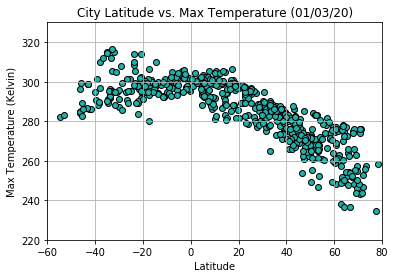

In [167]:
# Scatter plot of Latitude vs Temperature 
plt.scatter(city_reindex['Lat'], city_reindex['Max Temp'], facecolors='lightseagreen', 
            edgecolors='black')
# legend and titles
plt.title('City Latitude vs. Max Temperature (01/03/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Kelvin)')
plt.xlim(-60,80)
plt.ylim(220,330)
plt.grid()
# saves figure to Homework Data folder
plt.savefig("c:/Users/Rudy/Documents/Homework Data/HW6 APIs/lat_vs_temp.png")
plt.show()

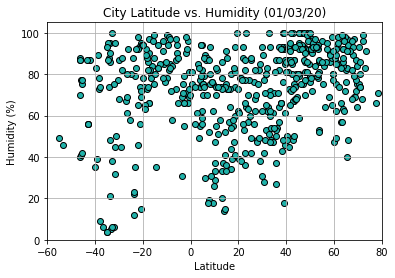

In [168]:
# Scatter plot of Latitude vs Humidity 
plt.scatter(city_reindex['Lat'], city_reindex['Humidity'], facecolors='lightseagreen', 
            edgecolors='black')
# legend and titles
plt.title('City Latitude vs. Humidity (01/03/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xlim(-60,80)
plt.ylim(0,105)
plt.grid()
# saves figure to Homework Data folder
plt.savefig("c:/Users/Rudy/Documents/Homework Data/HW6 APIs/lat_vs_humidity.png")
plt.show()

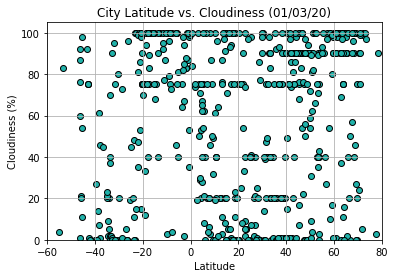

In [169]:
# Scatter plot of Latitude vs Cloudiness
plt.scatter(city_reindex['Lat'], city_reindex['Cloudiness'], facecolors='lightseagreen', 
            edgecolors='black')
# legend and titles
plt.title('City Latitude vs. Cloudiness (01/03/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlim(-60,80)
plt.ylim(0,105)
plt.grid()
# saves figure to Homework Data folder
plt.savefig("c:/Users/Rudy/Documents/Homework Data/HW6 APIs/lat_vs_clouds.png")
plt.show()

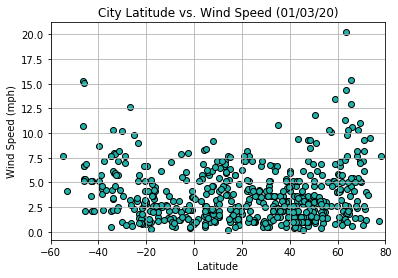

In [170]:
# Scatter plot of Latitude vs Wind Speed
plt.scatter(city_reindex['Lat'], city_reindex['Wind Speed'], facecolors='lightseagreen', 
            edgecolors='black')
# legend and titles
plt.title('City Latitude vs. Wind Speed (01/03/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xlim(-60,80)
plt.grid()
# saves figure to Homework Data folder
plt.savefig("c:/Users/Rudy/Documents/Homework Data/HW6 APIs/lat_vs_wind.png")
plt.show()